In [1]:
#Подключение библиотек
import numpy as np #для обработки массивов
import pandas as pd #для анализа данных
import matplotlib.pyplot as plt #для гистограмм, диаграмм
from factor_analyzer import FactorAnalyzer as Fa

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [2]:
PATH = "data.csv"
raw_df = pd.read_csv(PATH, encoding='windows-1252') #Для загрузки .csv файла с данными
data = raw_df.copy() #копируем файл

In [3]:
data.head() #возвращает записи из начала датафрейма

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
data.describe() #статистические характеристики

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [5]:
df = data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement']]
df.head() #возвращает записи из начала датафрейма

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800
...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020


In [44]:
kmo_all, kmo_model = calculate_kmo(df[df.columns]);
print('KMO score: {}'.format(kmo_model));

KMO score: 0.6064049945917674


In [45]:
fa = FactorAnalyzer(rotation=None)
fa.fit(df)
ev, v = fa.get_eigenvalues()

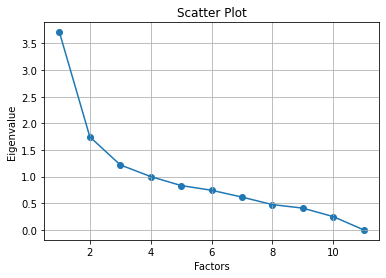

In [49]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scatter Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [51]:
communalities = pd.DataFrame(fa.get_communalities(), index=list(df.columns))
features_comm = list(communalities[communalities[0] > 0.2].index)
print('Всего переменных/признаков с общностями > 0.2: {}'.format(len(features_comm)))

Всего переменных/признаков с общностями > 0.2: 9


#### Факторный анализ с варимаксным (ортогональным) вращением и методом извлечения фактора максимального правдоподобия

In [82]:
fa = FactorAnalyzer(9, rotation='varimax')
fa.fit(df)
print(fa.loadings_)

[[ 2.24404860e-01  7.08584026e-02  1.89306952e-01 -2.68868072e-02
   4.73522520e-01  3.64078886e-02  3.83234358e-02 -1.36601391e-02
   1.98667995e-03]
 [ 7.22058159e-01  1.36125790e-01 -2.57931007e-03 -5.38261892e-02
   5.71015081e-02  3.34424327e-02 -1.20340122e-02  9.83622430e-03
   1.97700888e-02]
 [ 7.29854146e-01  1.55250664e-01  1.08466115e-01  2.75557590e-01
   2.59143867e-01  1.10170705e-01  2.62346300e-01 -1.82151188e-01
  -3.20714462e-02]
 [ 7.36851813e-01  2.48715879e-01  1.62826253e-01  1.69723802e-01
   4.47161058e-01  3.38851151e-01 -2.27448505e-02  1.48420270e-01
  -3.37911567e-03]
 [ 7.26993770e-02  4.54506528e-03  3.07446043e-02 -7.61533806e-03
   2.67885978e-02  4.14106285e-01  3.60266292e-04 -1.09987190e-03
   8.09424966e-04]
 [ 3.22424160e-01 -2.29387374e-01  2.41346469e-02  5.51392263e-01
   1.99830672e-01 -4.98866591e-02  3.38686548e-01  1.41660577e-02
   1.26005441e-02]
 [-3.04150995e-03 -6.44962175e-03  5.89313356e-01  2.55358122e-02
   5.85924496e-02 -4.7717302

In [83]:
lmatrix = pd.DataFrame(fa.loadings_, index = list(df.columns), columns=['FA1','FA2','FA3','FA4','FA5','FA6','FA7','FA8','FA9'])
lmatrix['Higest_loading'] = lmatrix .idxmax(axis=1)
lmatrix = lmatrix .sort_values('Higest_loading')
lmatrix 

,FA1,FA2,FA3,FA4,FA5,FA6,FA7,FA8,FA9,Higest_loading
bedrooms,0.722058,0.136126,-0.002579,-0.053826,0.057102,0.033442,-0.012034,0.009836,0.019770,FA1
bathrooms,0.729854,0.155251,0.108466,0.275558,0.259144,0.110171,0.262346,-0.182151,-0.032071,FA1
sqft_living,0.736852,0.248716,0.162826,0.169724,0.447161,0.338851,-0.022745,0.148420,-0.003379,FA1
sqft_above,0.680474,-0.206034,0.086698,0.337750,0.446190,0.376881,-0.014358,0.168895,-0.005255,FA1
condition,-0.016989,0.071057,0.021965,-0.489340,0.033235,-0.009256,0.026140,0.002568,0.004672,FA2
sqft_basement,0.265130,0.898875,0.176859,-0.275173,0.099146,0.003121,-0.020531,-0.005723,0.002749,FA2
waterfront,-0.003042,-0.006450,0.589313,0.025536,0.058592,-0.004772,-0.052040,-0.032127,-0.051063,FA3
view,0.101554,0.171590,0.623480,-0.065447,0.141031,0.102036,0.100289,0.053990,0.082781,FA3
floors,0.322424,-0.229387,0.024135,0.551392,0.199831,-0.049887,0.338687,0.014166,0.012601,FA4
price,0.224405,0.070858,0.189307,-0.026887,0.473523,0.036408,0.038323,-0.013660,0.001987,FA5


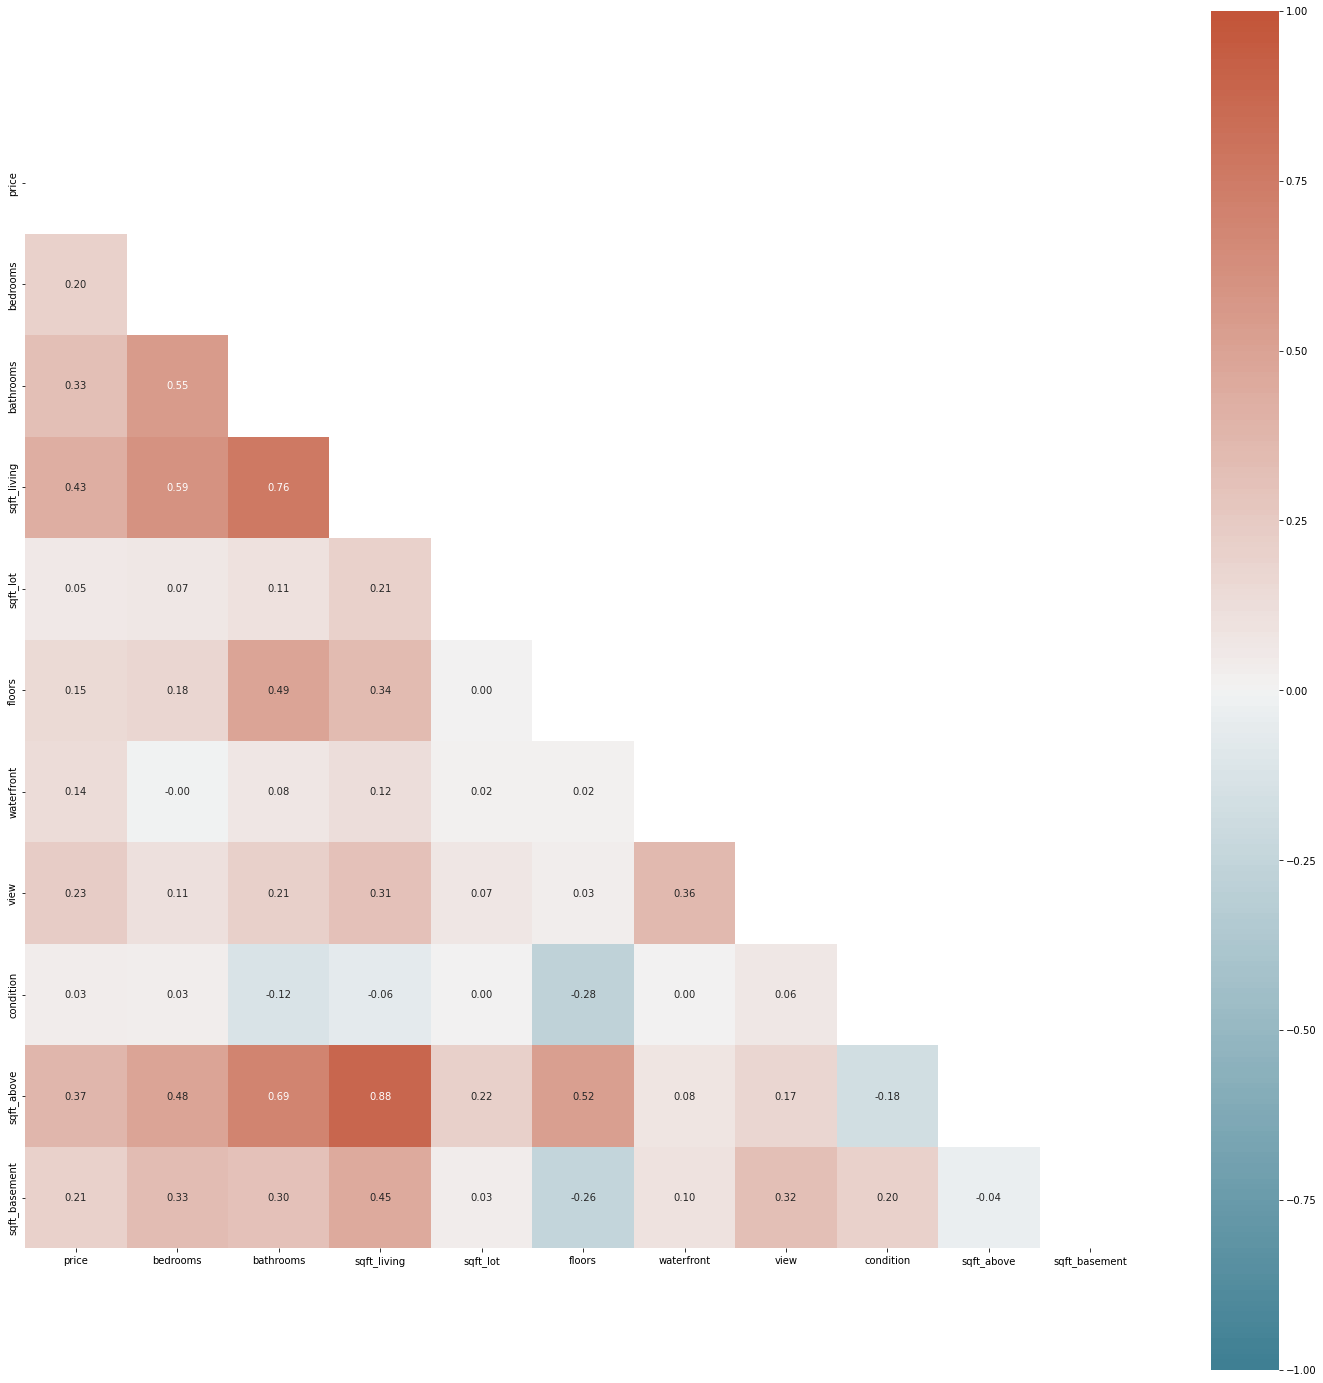

In [84]:
import seaborn as sns

plt.figure(figsize=(25,25))

# plot the heatmap for correlation matrix
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, 
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(220, 20, n=200),
                 mask=mask, square=True, 
                 annot=True, fmt='.2f')

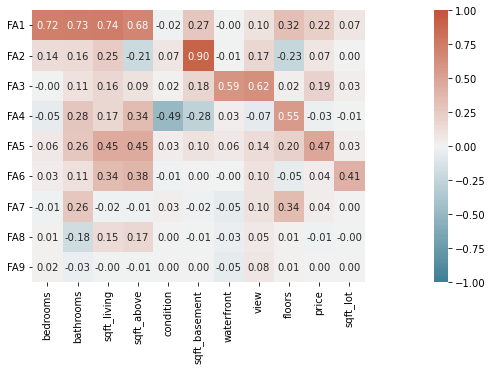

In [85]:
import seaborn as sns

plt.figure(figsize=(25,5))

# plot the heatmap for correlation matrix
ax = sns.heatmap(lmatrix.drop('Higest_loading', 
                 axis=1).T, 
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(220, 20, n=200),
                 square=True, annot=True, fmt='.2f')

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0);

* Как правило, интерпретируются только переменные с нагрузкой 0,32 и выше. 
* Чем больше нагрузка, тем больше переменная является чистой мерой фактора. 